# Aula 1 - Separabilidade Linear e Classificadores de Margem

Na aula de hoje vamos abordar os seguintes tópicos:

- 1. Introdução
- 2. Separabilidade Linear
- 3. Classificadores de Margem
- 4. Margem fixa vs. Margem suave
- 5. Dimensões superiores
- 6. Introdução aos SVMs

## 1. Introdução

Na aula de hoje, vamos conversar um pouco sobre um dos métodos mais elegantes de Machine Learning, que são as máquinas suportadas por vetor ou comumente conhecidas como *Support Vector Machines*. Não entraremos nos detalhes matemáticos, pois se trata de uma abordagem **bem avançada**, que envolve problemas de otimização por programação quadrática.

O grande poder dos SVMs reside no fato de que ele é capaz de **produzir uma hipótese simples, a partir de um conjunto de hipóteses complexo**, o que tem consequências diretas na **capacidade de generalização**.

Antes de começar a aula, deixaremos alguns links de livros e cursos para vocês buscarem, caso possuam grande interesse na matemática por trás do SVM:

- [Learning with Kernels](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), que detalha extensivamente SVM e métodos relacionados; 
- [Foundations of Machine Learning](https://cs.nyu.edu/~mohri/mlbook/), que aborda formalmente a teoria de aprendizagem, eventualmente culminando no enorme sucesso de SVMs. 
- [Curso do Prof. Yaser S. Abu-Mostafa](https://work.caltech.edu/index.html) do Caltech, onde os tópicos abordados no livro do Mohri são apresentados de maneira clara, direta, e muito ilustrativa.

Começaremos a discutir dois conceitos importantes: **separabilidade linear** e **classificadores de margem**.

## 2. Separabilidade Linear

Tomemos um exemplo de classificação binária - classes 0 e 1 num espaço bidimensional (ou seja, com atributos $x_1$ e $x_2$). Esse conjunto de dados é dito **linearmente separável**, se as seguintes condições matemáticas forem satisfeitas **concomitantemente**:

$$\forall x \in X_0, \sum_{i=1}^n w_i x_i > k$$

$$\forall x \in X_1, \sum_{i=1}^n w_i x_i < k$$

onde: $X_0$ é o subconjunto de amostras que pertencem à classe 0 e $X_1$ é o subconjunto de amostras que pertencem à classe 1

Graficamente falando, devemos ter uma situação parecida com a mostrada na Figura abaixo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

Expandindo-se esse conceito para $n$-dimensões (ou atributos), então dizemos que o conjunto de dados é linearmente separável se existir pelo menos um *hiperplano*, que também pode ser conhecido como *fronteira de decisão*, que separe completamente os dados nas categorias desejadas.

### Mas por que isso é importante?

Separabilidade linear é um atributo importante para a maioria dos modelos de alto viés, como por exemplo, a regressão logística. Se o problema não for linearmente separável, então dificilmente obter-se-á um desempenho adequado com a utilização desses modelo mais simples. É essencial sabermos qual tipo de conjunto de dados estamos lidando, para poder determinar quais modelos testar. Isso está muito relacionado com o custo envolvido no projeto, pois testar modelos desnecessariamente pode incorrer em custos significativos para o projeto.

### Como eu determino se meu conjunto de dados é linearmente separável?

Uma coisa simples realizada foi determinar a linearidade da fronteira de decisão por meio da análise visual. No entanto, em dados reais, a coisa pode ser um pouco mais complicada, principalmente se houver muitas dimensões, muitos dados, ou dados com muito ruído. [Esse artigo](https://tatwan.github.io/blog/python/2017/12/31/linear-separability.html#fn:3) apresenta um texto bem bacana sobre linearidade da fronteira de decisão e cita alguns métodos interessantes:

- **Conhecimento de Negócio** - sempre importante buscar informações com os analistas de negócios ou outros *stakeholders* do projeto, pessoas essas que lidam diariamente com os dados gerados pelo negócio e podem contribuir bastante com o estudo dos dados
- **Visualização de Dados** - o método mais simples e mais claro para verificar. Nem sempre é possível de verificar unicamente em 2D como no exemplo, mas pode ser usada uma abordagem `pairplot`.
- **Geometria Computacional** - um método bem parecido com que cria um "casco convexo", representando os limites de um conjunto de dados de uma determinada classe. Os conjuntos de dados serão linearmente separáveis se a intersecção de ambos for vazia
- **Métodos de Machine Learning** - classificadores como SVM ou Perceptrons (forma mais simples de redes neurais) podem fornecer resultados sobre a linearidade do problema.

In [35]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from scipy.spatial import ConvexHull

# ignorar warnings
warnings.filterwarnings('ignore')

In [36]:
# importando os dados
iris = load_iris(as_frame=True)

# criando um dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 1152x1152 with 0 Axes>

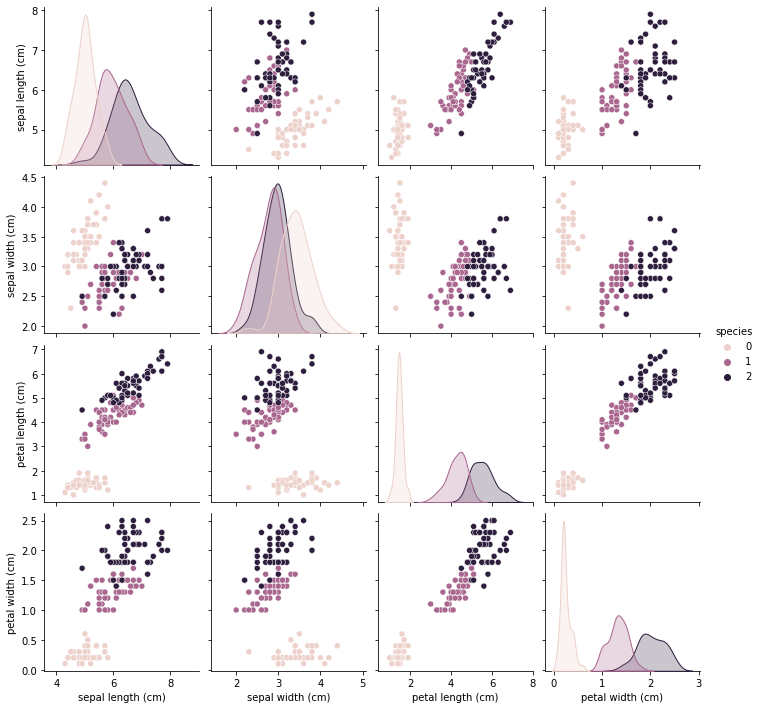

In [37]:
# checando pairplot
plt.figure(figsize=(16,16))
sns.pairplot(data, hue = 'species')
plt.show()

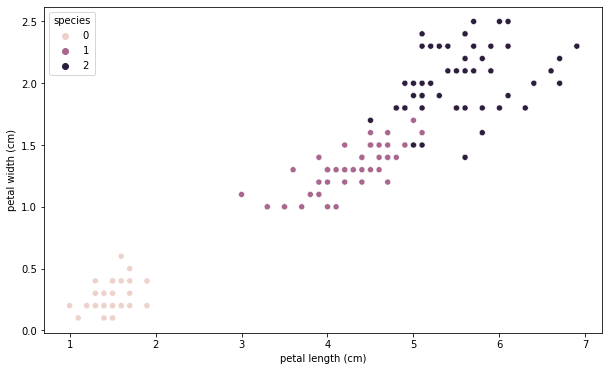

In [38]:
# maior nível de detalhamento
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'petal length (cm)',
                y = 'petal width (cm)',
                hue = 'species',
                data = data)
plt.show()

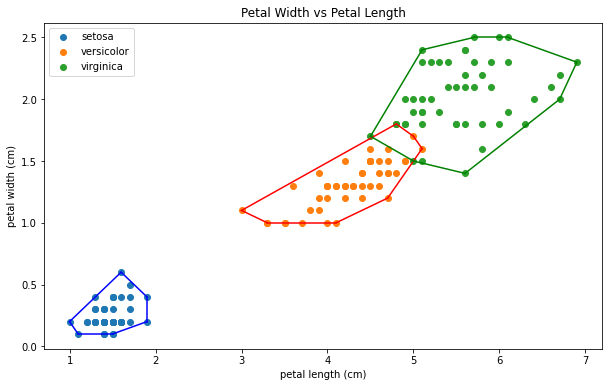

In [39]:
# aplicando os "cascos convexos"
plt.figure(figsize=(10,6))
names = iris.target_names
label = (iris.target).astype(np.int)
colors = ['b', 'r', 'g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

for i in range(len(names)):

    # amostrar conjuntos para cada espécie
    bucket = data.loc[data.species == i, ['petal length (cm)', 'petal width (cm)']].values

    # criando o "casco"
    hull = ConvexHull(bucket)

    # plotando os pontos
    plt.scatter(bucket[:, 0], bucket[:, 1], label = names[i])

    # traçando linhas de contorno
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])

plt.legend()
plt.show()

________

### Exercício 1

Com a base de dados enviada, realize a análise da linearidade da fronteira de decisão, pelos métodos de visualização de dados e também pelo método da computação geométrica. A partir dos resultados, proponha estratégias de modelagem para o classificador.

In [40]:
# importando a base de dados dos vinhos
data_wine = pd.read_csv('WineQT.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<Figure size 1152x1152 with 0 Axes>

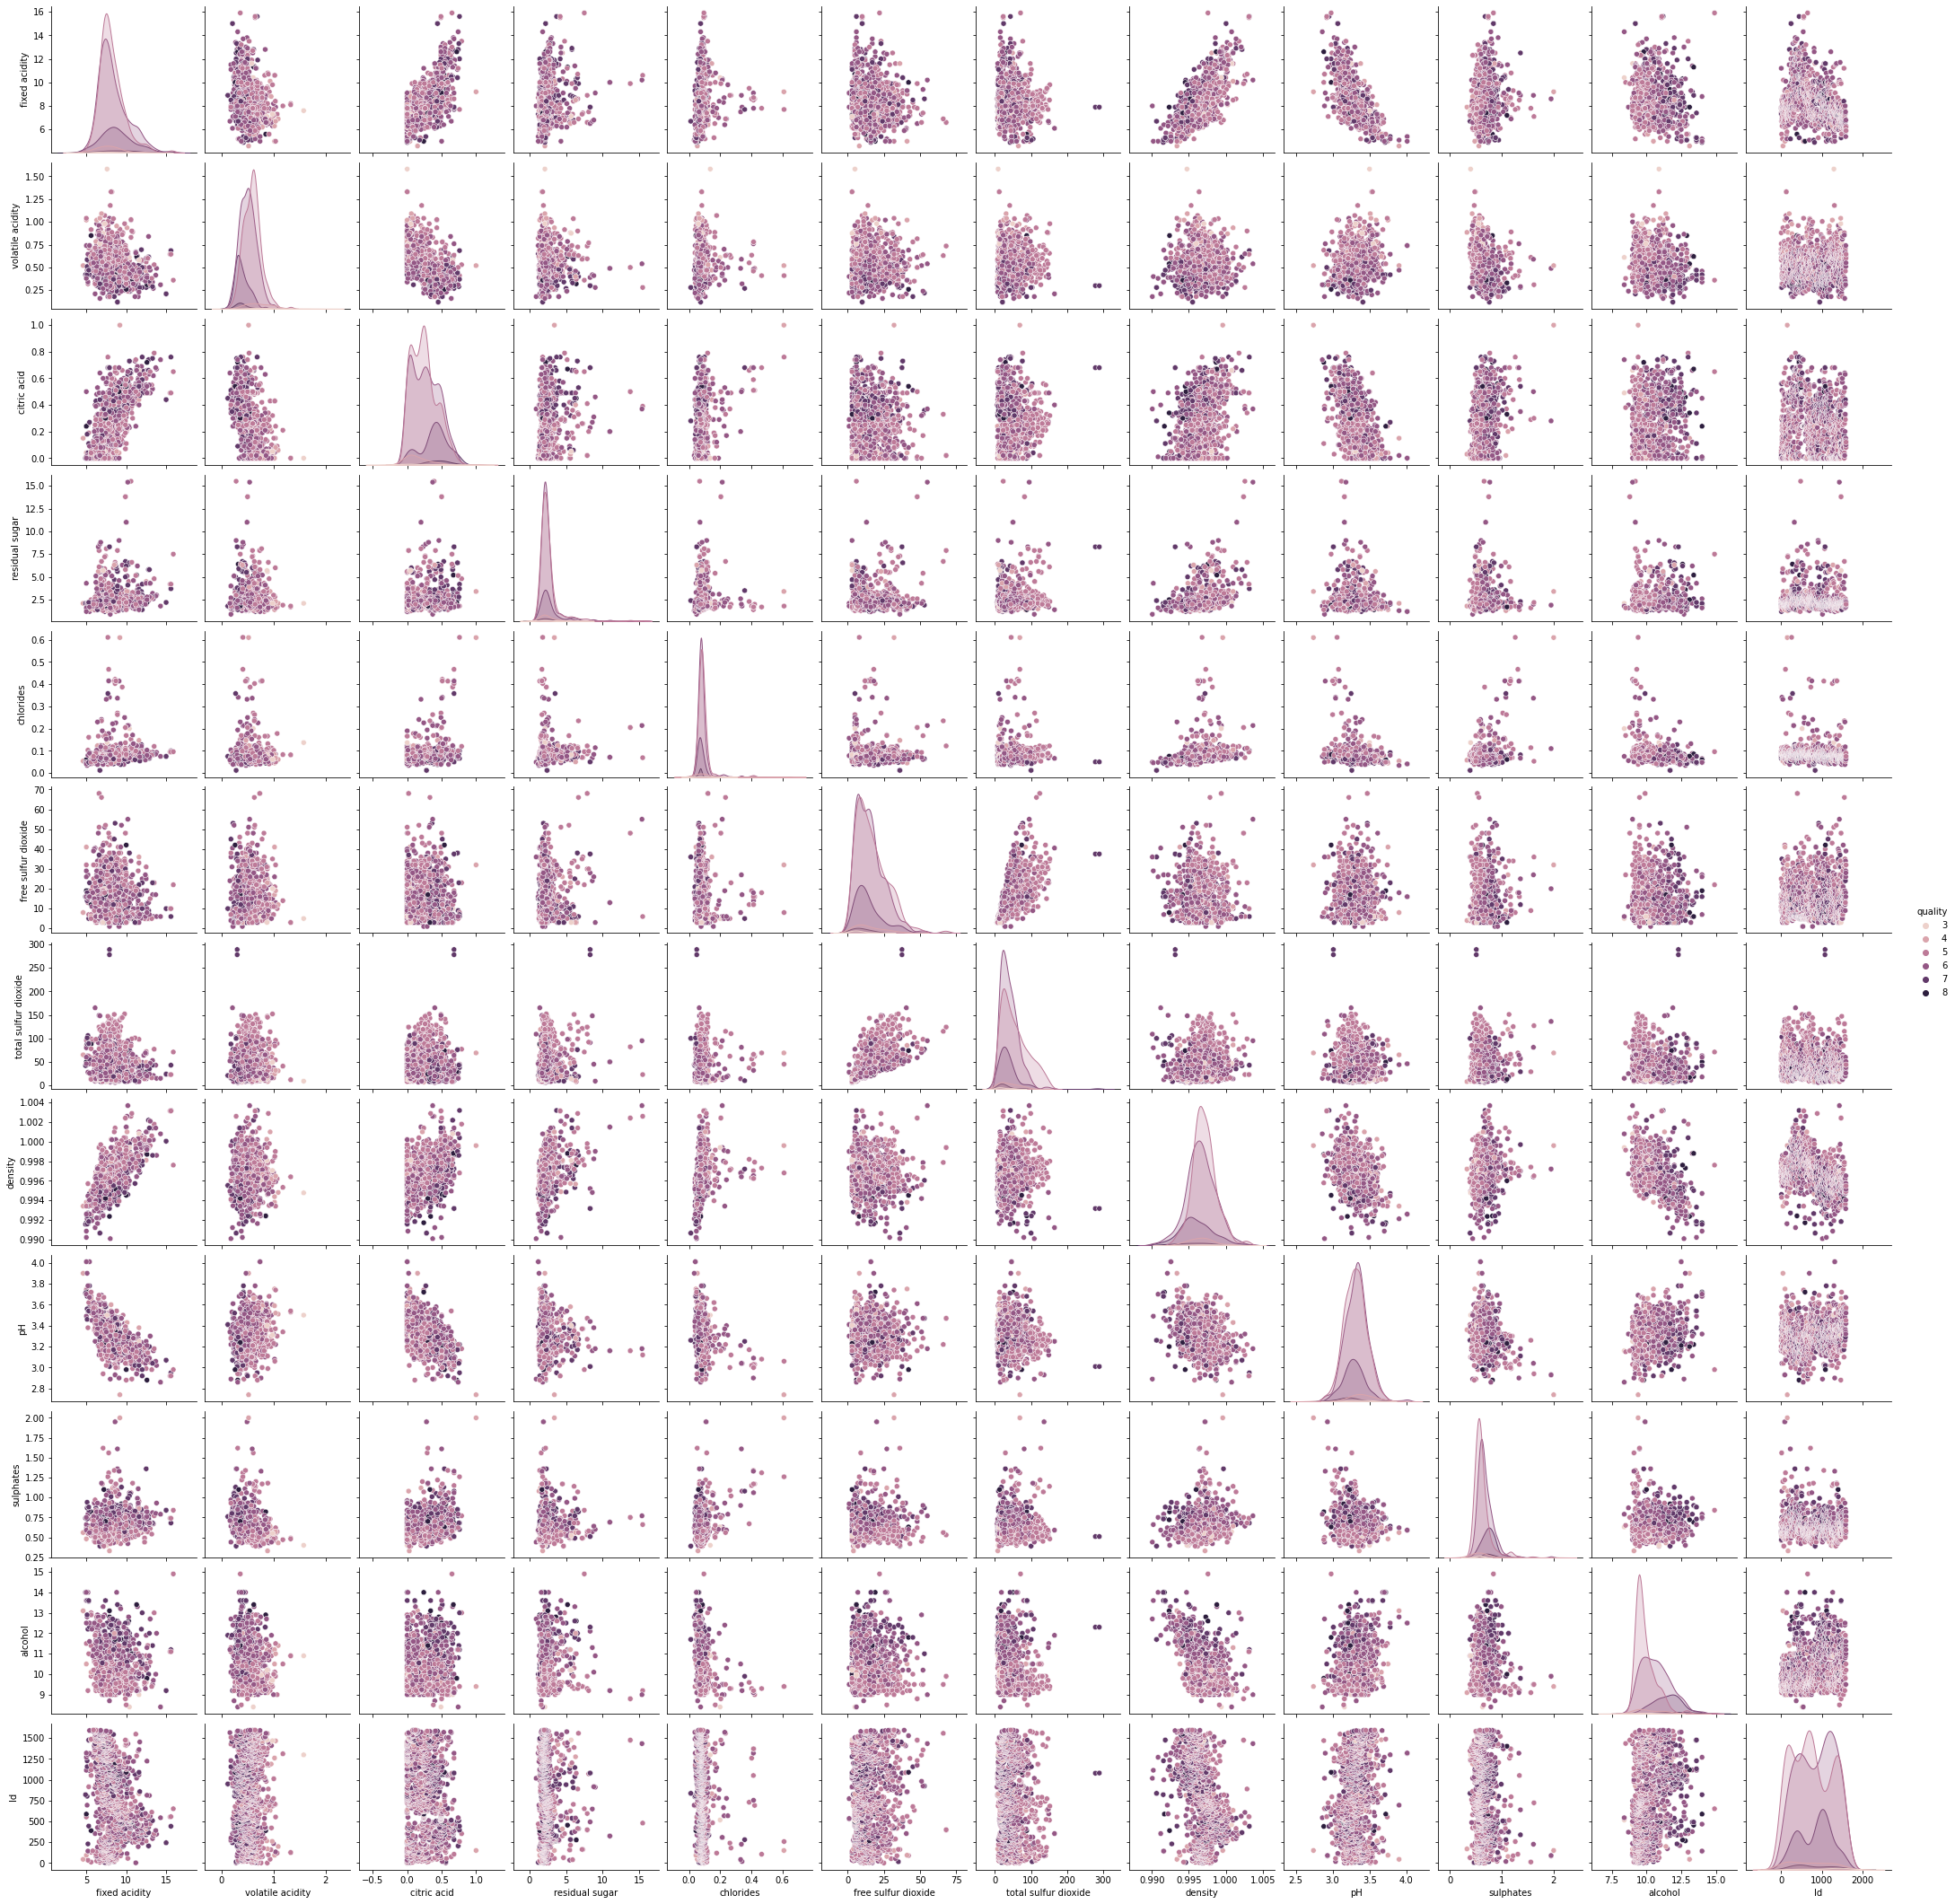

In [41]:
# checando pairplot
plt.figure(figsize=(16,16))
sns.pairplot(data_wine, hue = 'quality')
plt.show()

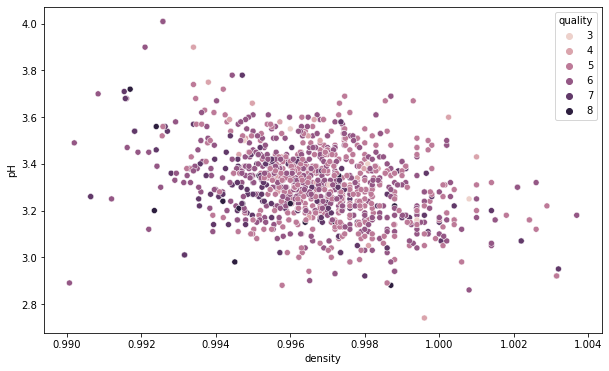

In [42]:
# maior nível de detalhamento
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'density',
                y = 'pH',
                hue = 'quality',
                data = data_wine)
plt.show()

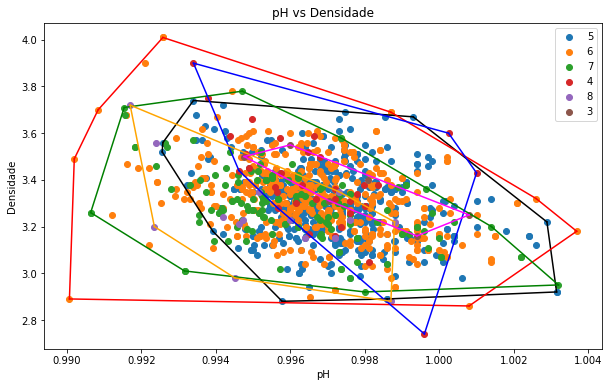

In [43]:
# aplicando os "cascos convexos"
plt.figure(figsize=(10,6))
label = list(data_wine.quality.unique())
colors = ['black', 'red', 'green', 'blue', 'orange', 'magenta', 'cyan']
plt.title('pH vs Densidade')
plt.xlabel('pH')
plt.ylabel('Densidade')

for i in range(len(label)):

    # amostrar conjuntos para cada espécie
    bucket = data_wine.loc[data_wine.quality == label[i], 
        ['density', 'pH']].values

    # criando o "casco"
    hull = ConvexHull(bucket)

    # plotando os pontos
    plt.scatter(bucket[:, 0], bucket[:, 1], label = label[i])

    # traçando linhas de contorno
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])

plt.legend()
plt.show()

___________________

## 3. Classificadores de Margem

Voltando ao nosso exemplo de classificação binária, podemos ver que o conjunto de dados é linearmente separável. No entanto, fica a pergunta: sabendo que existem infinitas retas que podem separar perfeitamente as duas classes. Então o que tornaria uma reta melhor do que a outra?

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Isso que dizer que algumas das retas possíveis apresentam menor capacidade de generalização do que outras. Intuitivamente, podemos notar que quanto **"mais próximo"** dos pontos de uma das classes, maior o risco de perda de generalização, visto que é menor a probabilidade de um novo ponto ser corretamente classificado. Assim sendo, podemos entender que os pontos que mais **influenciam** na tomada de decisão de qual reta escolher são os pontos mais externos de cada classe.

Aqui entra o conceito de **margem**:

> A **margem** é a **menor distância** entre os pontos de treino e a fronteira de decisão.

A intuição nos fala que um classificador de **margem máxima** é aquele que mais tem potencial de generalização, visto que ele oferece uma "segurança" maior para classificar corretamente novos pontos que sejam semelhantes aos dados de treinamento.

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

No entanto, a intuição de que um classificador de margem máxima sempre será nossa melhor opção não é 100% correta... Considere o dataset a seguir, bem parecido com o dataset original, mas contendo um outlier da classe vermelha:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/79154075-f167-4c46-b361-e1febbaa4d83.PNG width=400>

Devido a este outlier, até mesmo o classificador de margem máxima terá uma generalização ruim, pois mesmo a margem máxima é extremamente estreita, o que aumenta a variância do modelo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/da32de74-064a-43a7-98cc-366a348fe275.PNG width=400>

## 4. Margem Suave vs Margem Fixa

A margem "suave" é uma forma de regularização do classificador de margem fixa. Essencialmente, ela adiciona **variáveis de afrouxamento** na função de perda do a ser otimizada, de modo a permitir que alguns **erros de classificação** sejam cometidos na base de treino, com o intuito de ganhar certo grau de generalização para novos dados. O grau de afrouxamento (*slack variables*) é guiado pelo hiperparâmetro *C*, de forma semelhante ao realizado para regularizações lineares. Uma possível solução para o problema anterior seria algo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas.

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor.

> Um classificador de margem suave é também chamado de **classificador de vetores de suporte (Support Vector Classifier)**. Os pontos que apoiam a margem são os **vetores de suporte (support vectors)**.

## 5. Dimensões superiores

Dificilmente um conjunto de dados real vai ter somente duas dimensões. É comum que possuam múltiplas, variando de 30 a 500, ou muito mais.

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

### $D=2$

Se temos uma duas features$(X_1, X_2)$, teremos um **hiperplano $1-$ dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features$(X_1, X_2, X_3)$, teremos um **hiperplano $2-$ dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$ dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

## 6. Introdução ao *Support Vector Machines* (Classificação)

Nosso exemplo será um classificador para identificar a espécie "0", em particular (estratégia conhecida como *One-vs-All*). Para construir a classificação, vamos usar o modelo definido na classe `LinearSVC`, cuja documentação pode ser encontrada [nesse link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

In [44]:
# realizando transformação da espécie de interesse
data['species'] = data['species'].apply(lambda x: 1 if x != 0 else 0)
data['species'].value_counts()

1    100
0     50
Name: species, dtype: int64

In [45]:
# separando entre preditores e preditos
x = data.drop(['species'], axis = 1)
y = data[['species']]

# separando o conjunto treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [46]:
# criando o amostrador
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# criando o pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svm', LinearSVC())])

# criando o dicionário de distribuições
param_dict = {
    'svm__penalty': ['l1', 'l2'],
    'svm__C': np.linspace(0.1, 1e5, 10000)
}

In [47]:
# criando e treinando a seleção de hiperparâmetros
hyp_tun = RandomizedSearchCV(pipe, param_dict, n_iter=1000, scoring='accuracy', refit=True, random_state=2)
hyp_tun.fit(x_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm', LinearSVC())]),
                   n_iter=1000,
                   param_distributions={'svm__C': array([1.00000000e-01, 1.01009901e+01, 2.01019802e+01, ...,
       9.99799980e+04, 9.99899990e+04, 1.00000000e+05]),
                                        'svm__penalty': ['l1', 'l2']},
                   random_state=2, scoring='accuracy')

In [48]:
# verificando melhores parâmetros e melhor métrica
print('Melhores parâmetros: ', hyp_tun.best_params_)
print('Melhor acurácia média: ', hyp_tun.best_score_)

Melhores parâmetros:  {'svm__penalty': 'l2', 'svm__C': 9241.014851485148}
Melhor acurácia média:  1.0


In [49]:
# realizando novas predições
yhat = hyp_tun.best_estimator_.predict(x_test)

In [50]:
# relatório de classificação
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



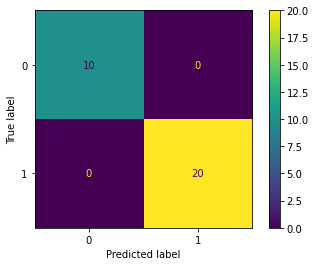

In [51]:
# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, yhat)

_________

### Exercício 2

Repita o exercício feito com o dataset 'Iris', porém com foco na identificação da espécie 2.

In [52]:
# importando os dados
iris = load_iris(as_frame=True)

# criando um dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
# realizando transformação da espécie de interesse
data['species'] = data['species'].apply(lambda x: 1 if x == 2 else 0)
data['species'].value_counts()

0    100
1     50
Name: species, dtype: int64

In [54]:
# separando entre preditores e preditos
x = data.drop(['species'], axis = 1)
y = data[['species']]

# separando o conjunto treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=2)

In [55]:
# criando o amostrador
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# criando o pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svm', LinearSVC())])

# criando o dicionário de distribuições
param_dict = {
    'svm__penalty': ['l1', 'l2'],
    'svm__C': np.linspace(0.1, 1e5, 10000)
}

In [60]:
# criando e treinando a seleção de hiperparâmetros
hyp_tun = RandomizedSearchCV(pipe, 
                            param_dict, 
                            n_iter=1000,
                            cv = cvs, 
                            scoring='accuracy', 
                            refit=True, random_state=2)
hyp_tun.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm', LinearSVC())]),
                   n_iter=1000,
                   param_distributions={'svm__C': array([1.00000000e-01, 1.01009901e+01, 2.01019802e+01, ...,
       9.99799980e+04, 9.99899990e+04, 1.00000000e+05]),
                                        'svm__penalty': ['l1', 'l2']},
                   random_state=2, scoring='accuracy')

In [61]:
# verificando melhores parâmetros e melhor métrica
print('Melhores parâmetros: ', hyp_tun.best_params_)
print('Melhor acurácia média: ', hyp_tun.best_score_)

Melhores parâmetros:  {'svm__penalty': 'l2', 'svm__C': 7480.840594059406}
Melhor acurácia média:  0.975


In [62]:
# realizando novas predições
yhat = hyp_tun.best_estimator_.predict(x_test)

# relatório de classificação
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



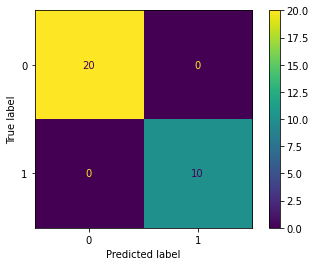

In [63]:
# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, yhat)

_______________________

### Exercício 3

Aplique o mesmo procedimento de Modelos SVM Linear no dataset de classificação de vinhos, com as seguintes regras:

- se a nota do vinho for igual ou superior a 6, ele é um vinho "bom" (classe 1)
- caso contrário, ele é um vinho comum (classe 0)

_____

In [64]:
# importando a base de dados dos vinhos
data_wine = pd.read_csv('WineQT.csv')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [65]:
# transformação da variável alvo
data_wine.quality = data_wine.quality.apply(lambda x: 1 if x >= 6 else 0)
data_wine.quality.value_counts(normalize=True)

1    0.543307
0    0.456693
Name: quality, dtype: float64

In [66]:
# separando entre preditores e preditos
x = data_wine.drop(['quality', 'Id'], axis = 1)
y = data_wine[['quality']]

# separando o conjunto treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=2)

In [67]:
# criando o amostrador
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

# criando o pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svm', LinearSVC())])

# criando o dicionário de distribuições
param_dict = {
    'svm__penalty': ['l1', 'l2'],
    'svm__C': np.linspace(0.1, 1e5, 10000)
}

In [68]:
# criando e treinando a seleção de hiperparâmetros
hyp_tun = RandomizedSearchCV(pipe, 
                            param_dict, 
                            n_iter=100,
                            cv = cvs, 
                            scoring='accuracy', 
                            refit=True, random_state=2)
hyp_tun.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm', LinearSVC())]),
                   n_iter=100,
                   param_distributions={'svm__C': array([1.00000000e-01, 1.01009901e+01, 2.01019802e+01, ...,
       9.99799980e+04, 9.99899990e+04, 1.00000000e+05]),
                                        'svm__penalty': ['l1', 'l2']},
                   random_state=2, scoring='accuracy')

In [69]:
# verificando melhores parâmetros e melhor métrica
print('Melhores parâmetros: ', hyp_tun.best_params_)
print('Melhor acurácia média: ', hyp_tun.best_score_)

Melhores parâmetros:  {'svm__penalty': 'l2', 'svm__C': 43264.38316831683}
Melhor acurácia média:  0.685


In [70]:
# realizando novas predições
yhat = hyp_tun.best_estimator_.predict(x_test)

# relatório de classificação
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.77      0.29      0.42       157
           1       0.61      0.92      0.73       186

    accuracy                           0.64       343
   macro avg       0.69      0.61      0.58       343
weighted avg       0.68      0.64      0.59       343



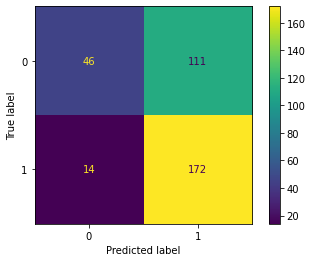

In [71]:
# matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, yhat)